In [265]:
using Pkg
Pkg.activate(".")
# Pkg.add("GraphPlot")

Activating environment at `~/hypergraph-clustering/jl/Project.toml`


    Status `~/hypergraph-clustering/jl/Project.toml`
  [8f4d0f93] Conda v1.4.1
  [864edb3b] DataStructures v0.17.9
  [b4f34e82] Distances v0.8.2
  [5789e2e9] FileIO v1.2.2
  [a2cc645c] GraphPlot v0.3.1
  [033835bb] JLD2 v0.1.12
  [093fc24a] LightGraphs v1.3.0
  [91a5bcdd] Plots v0.28.4
  [49802e3a] ProgressBars v0.6.0
  [92933f4c] ProgressMeter v1.2.0
  [438e738f] PyCall v1.91.3
  [d330b81b] PyPlot v2.8.2
  [3646fa90] ScikitLearn v0.5.1
  [aa4a32ff] SimpleHypergraphs v0.1.9 #master (https://github.com/pszufe/SimpleHypergraphs.jl)
  [2913bbd2] StatsBase v0.32.1


In [266]:
using Pkg, SimpleHypergraphs, Random, ProgressBars, Plots, ProgressMeter, JLD2, FileIO, PyPlot, ScikitLearn, GraphPlot
@sk_import metrics : f1_score 
@sk_import metrics : accuracy_score
include("HypergraphClustering.jl")

h2correlation (generic function with 2 methods)

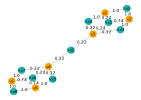

In [162]:
h1 = Hypergraph{Float64, Int, String}(6,9)
h1[1:3,1] .= 1.5
h1[1:2,2] .= 2.5
h1[2:3,3] .= 3.5
h1[1, 4] = 1
h1[3, 4] = 1
h1[3:4, 5] .= 4.5
h1[4:6,6] .= 5.5
h1[4:5,7] .= 6.5
h1[5:6, 8] .= 1
h1[4, 9] = 1
h1[6, 9] = 1
# SimpleHypergraphs.draw(h1, GraphBased, width=500, with_node_labels=true, with_he_labels=true, radius=20, stroke_width=10)
b = BipartiteView(h1)
bv = LightGraphs.SimpleGraph(b)

c = vcat(["orange" for i in 1:nhv(h1)], ["lightseagreen" for i in 1:nhe(h1)])
labels = vcat(string.("v", string.(1:nhv(h1))), string.("he", string.(1:nhe(h1))))

gplot(bv, nodelabel=labels, nodefillc=c, edgelabel=w)

In [157]:
bg = build_bg(h1)
function comp(x, y)
    if(x.from == y.from) return x.to < y.to end
    return x.from < y.from
end


w = round.(w, digits=2)

20-element Array{Float64,1}:
 0.74
 1.0 
 1.0 
 0.74
 1.0 
 1.0 
 0.24
 0.32
 0.32
 0.32
 0.32
 0.24
 0.32
 0.32
 0.74
 1.0 
 1.0 
 0.74
 1.0 
 1.0 

In [4]:
function build_trimcookpad(fname)
    io = open(fname, "r")
    lnum = 0
    recipe = []
    h = Hypergraph{Int}(75874, 54812)
    recipe_dict = Dict{Int,Int}()
    for line in tqdm(eachline(io)) #for each he
        lnum += 1
        if(lnum == 1) 
            continue
        end

        line = split(line, " ")
        
        ingredient_list = split.(line[2:end-2], ":")

        for i in ingredient_list
            ingredient = parse(Int, String(i[1]))
            h[ingredient, lnum-1] = 1
        end
    end
    close(io)

    return h
    
end

@time const trim_cookpad = build_trimcookpad("../ingredients_trim15.blbl")


┣╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱  ┫ -1it 00:02 [-1.2 it/s]
  2.322987 seconds (17.10 M allocations: 838.814 MiB, 33.40% gc time)


75874×54812 Hypergraph{Int64,Nothing,Nothing,Dict{Int64,Int64}}:
  nothing   nothing   nothing  …  nothing  nothing  nothing  nothing
 1         1          nothing     nothing  nothing  nothing  nothing
 1          nothing   nothing     nothing  nothing  nothing  nothing
  nothing  1          nothing     nothing  nothing  nothing  nothing
  nothing  1         1            nothing  nothing  nothing  nothing
  nothing  1          nothing  …  nothing  nothing  nothing  nothing
 1          nothing  1            nothing  nothing  nothing  nothing
  nothing   nothing   nothing     nothing  nothing  nothing  nothing
  nothing   nothing   nothing     nothing  nothing  nothing  nothing
 1          nothing   nothing     nothing  nothing  nothing  nothing
 1          nothing  1         …  nothing  nothing  nothing  nothing
 1          nothing   nothing     nothing  nothing  nothing  nothing
  nothing   nothing  1            nothing  nothing  nothing  nothing
 ⋮                             ⋱      

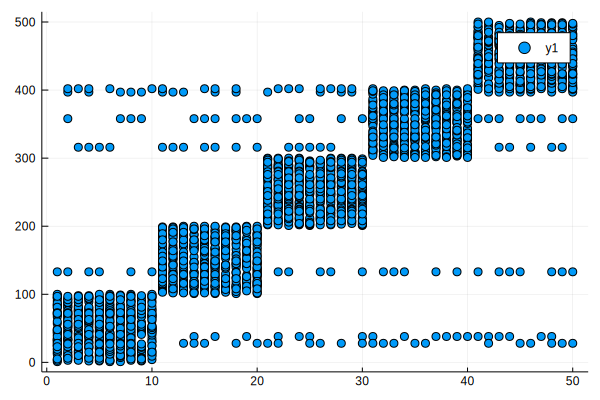

In [362]:
include("./CreateHypergraph.jl")
include("./ClusteringUtil.jl")
# 1clusterのnode number
a = [100 for i in 1:5]
# 1clusterのhe number
b = [10 for i in 1:5]

rg, noise, tr_data = create_hypergraph(a, b, 0.5, 0.02)
vi = visu(rg)
Plots.scatter(vi)
# h2txt(rg, "test")

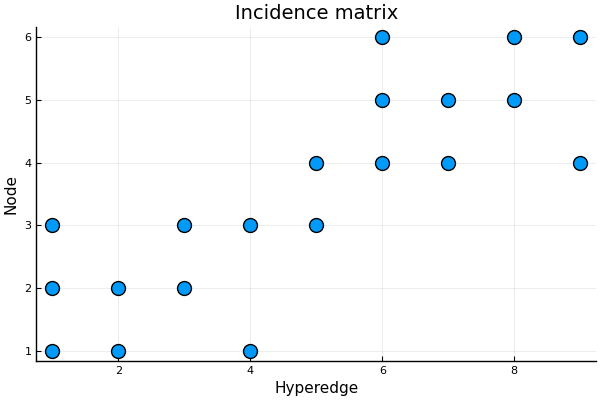

In [90]:
vi2 = visu(h1)
Plots.scatter(vi2, xlabel="Hyperedge", ylabel="Node", title="Incidence matrix", label="", markersize=10)

In [295]:
include("./ClusteringUtil.jl")
edges = build_bg(rg, general_weight)
order = noise_order(edges, noise)
# println(order)
# Plots.plot(order, xlabel="#noise node", ylabel="#order")

92-element Array{Any,1}:
   40
   68
  302
  303
  304
  305
  306
  307
  308
  309
  310
  471
  516
    ⋮
 2340
 2397
 2398
 2399
 2400
 2450
 2456
 2457
 2488
 2574
 2575
 2576

In [4]:
function build_youtube(fname)
    io = open(fname, "r")
    lnum = 0
    recipe = []
    h = Hypergraph{Int}(45352, 13251)
    recipe_dict = Dict{Int,Int}()
    for line in tqdm(eachline(io)) #for each he
        lnum += 1
        if(lnum == 1) 
            continue
        end

        line = split(line, " ")
        
        ingredient_list = split.(line[2:end-2], ":")

        for i in ingredient_list
            ingredient = parse(Int, String(i[1]))
            h[ingredient, lnum-1] = 1
        end
    end
    close(io)

    return h
    
end

@time const youtube = build_youtube("../youtube_giant.blbl")

┣╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱  ┫ -1it 00:01 [-3.8 it/s]
  0.940748 seconds (3.32 M allocations: 169.309 MiB, 7.40% gc time)
┣╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱   ╱  ┫ -1it 00:29 [-0.1 it/s]
 30.610976 seconds (224.35 M allocations: 10.084 GiB, 13.24% gc time)


487568×1712897 Hypergraph{Int64,Nothing,Nothing,Dict{Int64,Int64}}:
 1          nothing  nothing   nothing  …  nothing  nothing  nothing  nothing
 1          nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing  1         nothing  1            nothing  nothing  nothing  nothing
  nothing   nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing   nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing   nothing  nothing   nothing  …  nothing  nothing  nothing  nothing
  nothing  1         nothing   nothing     nothing  nothing  nothing  nothing
 1          nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing   nothing  nothing   nothing     nothing  nothing  nothing  nothing
  nothing  1         nothing   nothing     nothing  nothing  nothing  nothing
 1          nothing  nothing   nothing  …  nothing  nothing  nothing  nothing
  nothing   nothing  nothing   nothing     nothing  nothing  nothing  noth

In [134]:
edges

5023-element Array{edge,1}:
 edge(265, 528, 0.08712266624470001) 
 edge(294, 530, 0.08427386820686841) 
 edge(426, 542, 0.08104434069274419) 
 edge(16, 502, 0.08104434069274419)  
 edge(179, 520, 0.08060978698048282) 
 edge(179, 512, 0.08060978698048282) 
 edge(29, 504, 0.07920242385881819)  
 edge(382, 532, 0.07889468512983426) 
 edge(270, 528, 0.07871086032916969) 
 edge(270, 521, 0.07871086032916969) 
 edge(237, 521, 0.07871086032916969) 
 edge(83, 502, 0.07680430448823362)  
 edge(281, 528, 0.07537257551355662) 
 ⋮                                   
 edge(356, 557, 0.008902091410101906)
 edge(356, 556, 0.008902091410101906)
 edge(51, 557, 0.008902091410101906) 
 edge(51, 556, 0.008902091410101906) 
 edge(356, 558, 0.008798175946170756)
 edge(51, 558, 0.008798175946170756) 
 edge(450, 559, 0.008728405413467366)
 edge(367, 559, 0.008728405413467366)
 edge(91, 559, 0.008728405413467366) 
 edge(53, 559, 0.008728405413467366) 
 edge(356, 559, 0.008500493301375504)
 edge(51, 559, 0.00850

In [363]:
include("./HypergraphClustering.jl")
include("./ClusteringUtil.jl")
@time dendorogram,uf,ms,gs, ks,nvh, hevh, part = clustering3(rg, 1, modularity, tfidf)

  1.598508 seconds (8.94 M allocations: 288.891 MiB, 7.04% gc time)


(Tuple{Int64,Int64,Int64}[(166, 1, 30), (245, 2, 30), (1111, 3, 30), (337, 4, 30), (90, 5, 79), (458, 6, 30), (457, 7, 30), (456, 8, 30), (196, 9, 30), (164, 10, 30)  …  (112, 541, 426), (7, 542, 426), (34, 543, 469), (63, 544, 412), (8, 545, 488), (41, 546, 490), (77, 547, 442), (76, 548, 442), (110, 549, 426), (53, 550, 469)], UnionFind{Int64}([30, 30, 30, 30, 30, 30, 30, 30, 30, 30  …  163, 163, 163, 163, 163, 163, 163, 163, 163, 163]), Any[-2.5487483564480212e-83, -2.5487483564480212e-83, -2.5487483564480212e-83, -2.5487483564480212e-83, -2.5487483564480212e-83, -2.5487483564480212e-83, -2.5487483564480212e-83, -2.5487483564480212e-83, -2.5487483564480212e-83, -2.5487483564480212e-83  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Any[0.0, 0.0, 0.002, 0.002, 0.003991951710261569, 0.005991935483870968, 0.005991935483870968, 0.005991935483870968, 0.005991935483870968, 0.005991935483870968  …  0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996], Any[500, 500, 

In [359]:
# for i in part
#     println(i)
# end
part

1-element Array{Set{Int64},1}:
 Set([288, 306, 29, 300, 289, 74, 435, 176, 57, 285  …  341, 321, 186, 420, 6, 423, 271, 23, 315, 322, 218])

0.2799921225357492


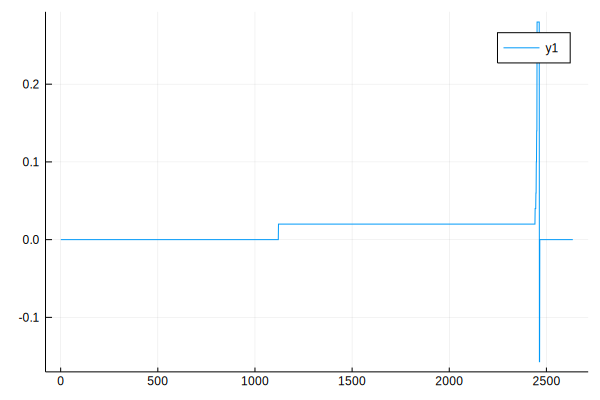

In [364]:
println(maximum(ms))
Plots.plot(ms)

In [361]:
gr()

Plots.GRBackend()

0.799917945403801


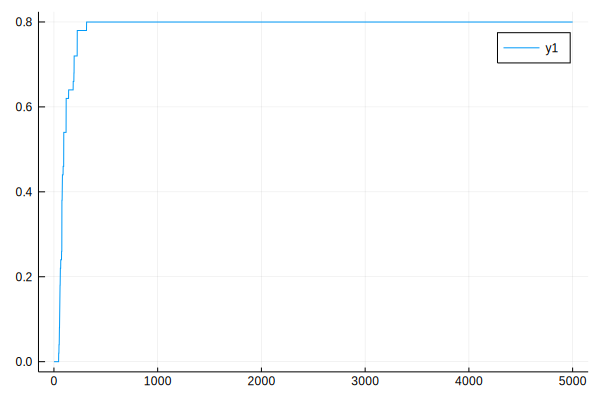

In [309]:
cfm = CFModularityCNMLike(5000)
bm, bp, hist = findcommunities(rg, cfm)
println(bm)
Plots.plot(hist)

In [228]:
include("./HypergraphClustering.jl")
act_sc = part2is_samecluster(tr_data)
pred_sc = part2is_samecluster(part)
jl_sc = part2is_samecluster(bp)
jl_fscore = f1_score(act_sc, jl_sc)
jl_acc = accuracy_score(act_sc, jl_sc)
fscore = f1_score(act_sc, pred_sc)
acc = accuracy_score(act_sc, pred_sc)
println(fscore, ' ', acc, ' ', jl_fscore, ' ', jl_acc)
include("HypergraphClustering.jl")

@time arr1, arr2 = h2correlation(rg, tfidf, general_weight)
using StatsBase
# スピアマン ケンドール
corspearman(arr1, arr2), corkendall(arr1, arr2)

0.3275728472819558 0.2417555110220441 0.3628346715066499 0.5019078156312625
  0.633562 seconds (933.07 k allocations: 52.472 MiB)


(0.7061981859514724, 0.5227084554056178)

In [226]:
include("./ClusteringUtil.jl")
build_bg(rg, tfidf)

2610-element Array{edge,1}:
 edge(381, 537, 0.01818480958994914)  
 edge(320, 537, 0.01818480958994914)  
 edge(311, 537, 0.01818480958994914)  
 edge(363, 535, 0.017797184802275892) 
 edge(333, 534, 0.0174805089161144)   
 edge(279, 528, 0.017174905613385128) 
 edge(443, 541, 0.01714990172710651)  
 edge(412, 541, 0.01714990172710651)  
 edge(392, 533, 0.016996619395945142) 
 edge(381, 538, 0.01647998369089141)  
 edge(314, 538, 0.01647998369089141)  
 edge(377, 537, 0.016437115158448434) 
 edge(353, 537, 0.016437115158448434) 
 ⋮                                    
 edge(60, 544, 0.0069646102313549235) 
 edge(26, 506, 0.006925971715233542)  
 edge(47, 510, 0.006885060454971241)  
 edge(23, 510, 0.006885060454971241)  
 edge(11, 510, 0.006885060454971241)  
 edge(26, 509, 0.006831868838667868)  
 edge(495, 549, 0.0068133542889695815)
 edge(26, 510, 0.006633582407994131)  
 edge(60, 502, 0.006501589052539084)  
 edge(60, 506, 0.006465767625252367)  
 edge(60, 509, 0.006377917521648394)

In [64]:
ϕₛ = []
for subset in part
    ϕ = conductance(rg, subset)
    if !isnan(ϕ) append!(ϕₛ, (ϕ, subset)); end
#     println(conductance(rg, subset))
end

In [65]:
for i in ϕₛ
    println(i)
end

2.564741035856574
Set([491, 464, 478, 499, 477, 435, 494, 448, 490, 407, 459, 479, 433, 445, 473, 457, 489, 440, 425, 474, 418, 455, 441, 481, 417, 412, 447, 467, 430, 426, 401, 493, 482, 469, 410, 484, 414, 471, 416, 456, 497, 443, 429, 413, 439, 463, 472, 438, 449, 480, 461, 486, 495, 462, 428, 458, 483, 403, 406, 421, 451, 452, 492, 434, 487, 453, 408, 419, 444, 466, 436, 460, 475, 450, 470, 442, 432, 468, 437, 500, 465, 404, 488, 431, 409, 402, 411, 476, 422, 415, 420, 454, 424, 423, 427, 446, 485, 498, 496, 405])
2.6089159067882473
Set([197, 158, 134, 136, 160, 151, 131, 144, 142, 173, 176, 159, 112, 106, 121, 165, 114, 109, 182, 133, 138, 168, 117, 115, 101, 188, 132, 195, 157, 178, 198, 153, 154, 120, 113, 184, 167, 189, 122, 143, 107, 169, 102, 180, 162, 129, 149, 148, 124, 170, 181, 193, 155, 150, 199, 185, 139, 111, 194, 175, 200, 166, 187, 135, 125, 172, 146, 130, 145, 192, 110, 127, 126, 137, 141, 105, 190, 128, 147, 104, 183, 179, 103, 152, 118, 140, 196, 174, 161, 186, 11

In [75]:
conductance(rg, Set(400:500))

2.9116781157998037

In [70]:
conductance(union(Set(1:50), Set(300:350))

Set([329, 2, 306, 11, 39, 46, 25, 42, 29, 8  …  23, 305, 315, 322, 349, 27, 331, 301, 41, 15])

In [37]:
include("HypergraphClustering.jl")
# @time build_bg(cookpad)
@time arr1, arr2 = h2correlation(rg, tfidf, general_weight)
# @time arr1, arr2 = h2correlation(cookpad)

  0.687074 seconds (1.15 M allocations: 69.093 MiB, 2.98% gc time)


([1429, 3897, 3267, 3300, 3596, 4015, 3372, 298, 1734, 3410  …  4633, 7932, 7323, 7602, 7322, 9167, 7931, 9502, 7505, 6765], [2773, 11555, 5583, 6453, 9713, 11867, 8215, 615, 2593, 3865  …  3042, 7332, 5585, 6745, 5584, 9108, 7331, 10018, 6454, 4430])

In [41]:
using StatsBase
# スピアマン ケンドール
corspearman(arr1, arr2), corkendall(arr1, arr2)

(0.7546161791462117, 0.585661867767498)

In [647]:
rank1 = Dict([i => Dict([j => 0 for j in 1:nhe(rg)]) for i in 1:nhv(rg)])
rank2 = Dict([i => Dict([j => 0 for j in 1:nhe(rg)]) for i in 1:nhv(rg)])

Dict{Int64,Dict{Int64,Int64}} with 1000 entries:
  306 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  29  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  74  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  905 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  176 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  892 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  285 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  318 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  873 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  975 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  354 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  610 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  563 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85

In [436]:
rank1 = Dict([i => Dict([j => 0 for j in 1:nhe(cre)]) for i in 1:nhv(cre)])
rank2 = Dict([i => Dict([j => 0 for j in 1:nhe(cre)]) for i in 1:nhv(cre)])

Dict{Int64,Dict{Int64,Int64}} with 500 entries:
  288 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  306 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  11  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  491 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  134 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  158 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  160 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  215 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  464 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  29  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  131 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  391 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  249 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=

In [648]:
for (i, e) in enumerate(okapi_e)
    rank1[e.from][e.to-nhv(rg)] = i
end

for (i, e) in enumerate(tfidf_e)
    rank2[e.from][e.to-nhv(rg)] = i
end

In [649]:
arr1 = Array{Int64}([])
arr2 = Array{Int64}([])
for node in 1:nhv(rg)
    for he in 1:nhe(rg)
#         if rank1[node][he] != 0 println(rank1[node][he]) end
#         println(rank1[node][he])
        if rank1[node][he] != 0 push!(arr1, rank1[node][he]::Int64) end
        if rank2[node][he] != 0 push!(arr2, rank2[node][he]::Int64) end
    end
end
arr1
arr2

5977-element Array{Int64,1}:
   68
  532
 5408
 5365
 5684
 5841
 5578
 5532
 5747
  520
  406
 3160
 3265
    ⋮
 4606
 5136
 5409
 1126
 1181
 1089
  812
  725
 2642
 2952
 2456
 2359

In [512]:
include("./HypergraphClustering.jl")
act_sc = part2is_samecluster(tr_data)
pred_sc = part2is_samecluster(part)
jl_sc = part2is_samecluster(bp)

124750-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [514]:
fscore = f1_score(act_sc, pred_sc)
acc = accuracy_score(act_sc, pred_sc)
fscore, acc

(1.0, 1.0)

In [16]:
include("ClusteringUtil.jl")
build_bg(rg, (a, b, c, d)->rand(1)[1])

11867-element Array{edge,1}:
 edge(135, 1111, 0.9997790574898802)    
 edge(928, 1126, 0.9997642499107877)    
 edge(580, 1115, 0.9997326416160144)    
 edge(232, 1115, 0.9996731379063613)    
 edge(710, 1103, 0.9996436487388372)    
 edge(201, 1102, 0.999581563524607)     
 edge(142, 1114, 0.9994903038716114)    
 edge(757, 1114, 0.9994608008213495)    
 edge(300, 1025, 0.9994448671877059)    
 edge(721, 1109, 0.9992609000934001)    
 edge(528, 1130, 0.99913246064535)      
 edge(186, 1112, 0.9990445976759827)    
 edge(585, 1106, 0.9990329543406917)    
 ⋮                                      
 edge(871, 1124, 0.0009270278181878755) 
 edge(909, 1100, 0.0009140317707285739) 
 edge(285, 1123, 0.0008821462182790896) 
 edge(676, 1129, 0.0008746781865944797) 
 edge(789, 1124, 0.0007566624456201154) 
 edge(111, 1019, 0.0007118568370803047) 
 edge(305, 1102, 0.0004951634166716623) 
 edge(254, 1121, 0.0002712502071902101) 
 edge(857, 1083, 0.00021220272606492507)
 edge(314, 1102, 0.000186067

In [422]:
okapi_e

5976-element Array{edge,1}:
 edge(474, 595, 1.7287111814491267) 
 edge(109, 537, 1.5087976810200372) 
 edge(203, 546, 1.47742305582154)   
 edge(203, 545, 1.4473266864420467) 
 edge(109, 540, 1.4473266864420467) 
 edge(474, 592, 1.435652681237273)  
 edge(490, 595, 1.4275408753071768) 
 edge(482, 595, 1.4275408753071768) 
 edge(250, 544, 1.4164821308530162) 
 edge(474, 584, 1.4091106311930666) 
 edge(150, 529, 1.3835223686522922) 
 edge(145, 529, 1.3835223686522922) 
 edge(137, 529, 1.3835223686522922) 
 ⋮                                  
 edge(125, 603, 0.14731309666677198)
 edge(5, 603, 0.14731309666677198)  
 edge(186, 602, 0.1466446389681438) 
 edge(11, 602, 0.1466446389681438)  
 edge(383, 601, 0.14440655613499506)
 edge(186, 601, 0.14440655613499506)
 edge(11, 601, 0.14440655613499506) 
 edge(383, 603, 0.14117465578249266)
 edge(186, 603, 0.14117465578249266)
 edge(11, 603, 0.14117465578249266) 
 edge(176, 602, 0.14053385606546856)
 edge(176, 603, 0.13529181083898184)

45352×13251 Hypergraph{Int64,Nothing,Nothing}:
 nothing  1         nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  1         nothing  nothing     nothing  nothing  nothing  nothing
 nothing  1         nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing   nothing  nothing  nothing     

In [9]:
rg

UndefVarError: UndefVarError: rg not defined